In [19]:
%load_ext autoreload
%autoreload 2
import seaborn as sns
from pyr_flow.utils.evaluation_utils import *
import importlib

#importlib.reload(pyr_flow.utils.evaluation_utils)


from matplotlib import pyplot as plt
%matplotlib inline


sns.set_style('whitegrid')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
COMPLETE_NLL = 0
TOP_NLL = 1

In [21]:
file_name = '1 - Test loss -2.89671 nll 1.05178 Norm -0.83318 Top Loss -5.46255 Eval loss -2.89961 nll 1.04827 Norm -0.83318 Top Loss -5.46562'
file_name = "33 - Test loss -88.45176 nll -9.61440 Norm -11.50307 Top Loss -158.35823 Eval loss -88.47104 nll -9.62277 Norm -11.50307 Top Loss -158.36227"
file_name = "1 - Test loss 3.02440 nll 1.75219 Norm -0.16369 Top Loss 36.83128 Eval loss 3.02658 nll 1.74084 Norm -0.16109 Top Loss 37.54357"
file_name = "3 - Test loss 2.70742 nll 1.69820 Norm -0.20784 Top Loss 31.87110 Eval loss 2.67430 nll 1.68411 Norm -0.20756 Top Loss 32.18726"
file_name = "6 - Test loss 2.50916 nll 1.65136 Norm -0.25620 Top Loss 28.61501 Eval loss 2.44181 nll 1.63358 Norm -0.25721 Top Loss 28.46322"
file_name = "8 - Test loss 2.43811 nll 1.62904 Norm -0.27982 Top Loss 27.50301 Eval loss 2.35826 nll 1.60928 Norm -0.28139 Top Loss 27.15023"
file_name = "9 - Test loss 2.41103 nll 1.61941 Norm -0.29006 Top Loss 27.09558 Eval loss 2.32584 nll 1.59875 Norm -0.29190 Top Loss 26.64318"
file_name = "10 - Test loss 2.38677 nll 1.61055 Norm -0.29953 Top Loss 26.72281 Eval loss 2.29696 nll 1.58905 Norm -0.30162 Top Loss 26.18091"
file_name = "13 - Test loss 2.32711 nll 1.58756 Norm -0.32428 Top Loss 25.79114 Eval loss 2.22502 nll 1.56376 Norm -0.32711 Top Loss 24.98626"
file_name = "16 - Test loss 2.28149 nll 1.56848 Norm -0.34479 Top Loss 25.07553 Eval loss 2.16843 nll 1.54267 Norm -0.34838 Top Loss 24.01737"
file_name = "18 - Test loss 2.25386 nll 1.55740 Norm -0.35674 Top Loss 24.59081 Eval loss 2.13560 nll 1.53040 Norm -0.36081 Top Loss 23.42924"
file_name = "20 - Test loss 2.22880 nll 1.54736 Norm -0.36754 Top Loss 24.12832 Eval loss 2.10620 nll 1.51929 Norm -0.37208 Top Loss 22.89656"
model_path = f'../{STATE_DIR}CIFAR/{file_name}.model'

results = load_eval_data(model_path)

##########################################################################

Creating Pyramid Flow Network
Channel Shifter - Shift 27 by 3
Conv Bundle 15 - Size: 9 total_pixel_depth: 27 internal_pixel_depth: 3 jump_over_pixels :True |param count: 2457.0
Bent Identity
Cut Off - Remaining Depth 13
Combine Neighbors - 2x2
Channel Shifter - Shift 52 by 13
Conv Bundle 16 - Size: 4 total_pixel_depth: 52 internal_pixel_depth: 13 jump_over_pixels :True |param count: 4342.0
Bent Identity
Cut Off - Remaining Depth 26
Combine Neighbors - 2x2
Channel Shifter - Shift 104 by 26
Conv Bundle 17 - Size: 4 total_pixel_depth: 104 internal_pixel_depth: 26 jump_over_pixels :True |param count: 17134.0
Bent Identity
Cut Off - Remaining Depth 52
Combine Neighbors - 2x2
####Last Pixel Stuff:
Channel Shifter - Shift 208 by 104
Conv Bundle 18 - Size: 2 total_pixel_depth: 208 internal_pixel_depth: 104 jump_over_pixels :True |param count: 38220.0
Bent Identity
Cut Off - Remaining Depth 69
Channel Shifter - Shift 69

C:\Mega\trunk\pyramidic-normalizing-flow\pyr_flow\misc\misc.py:25: UserWarning: There need to be as many waste_steps need to align with pyramid_steps
  warnings.warn(text)


In [22]:
results[EvaluatedDatasets.CIFAR_TRAIN][TOP_NLL].max()

28.925484

In [23]:
def filter_threshold(llarray, threshold):
    print(np.sum(llarray < threshold)/len(llarray)*100, "inliers")
    return llarray[llarray < threshold]

def plot_mean(set):
    mean = set.mean()
    plt.vlines(mean)

def plot_all(idx, threshold):
    c_train = results[EvaluatedDatasets.CIFAR_TRAIN][idx]
    c_test = results[EvaluatedDatasets.CIFAR_TEST][idx]
    svhn = results[EvaluatedDatasets.SVHN][idx]

    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)


    sns.distplot(filter_threshold(c_train, threshold), label=f"Cifar Test {c_test.mean():.5f}", color='r', ax=ax)
    sns.distplot(filter_threshold(c_test, threshold), label=f"Cifar Train {c_train.mean():.5f}", color='g', ax=ax)
    sns.distplot(filter_threshold(svhn, threshold), label=f"SVHN {svhn.mean():.3f}", color='b', ax=ax)

    plt.axvline(c_test.mean(), color='r')
    plt.axvline(c_train.mean(), color='g')
    plt.axvline(svhn.mean(), color='b')

    # plt.xticks(np.linspace(-11000, 0, 5), fontsize=16)
    #plt.yticks(np.linspace(0., 0.0006, 5), fontsize=13)
    plt.legend(fontsize=13)
    plt.xlabel("nll / dim")

99.0 inliers
98.825 inliers
99.95 inliers


C:\Users\luifire\.conda\envs\pyrFlow\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\luifire\.conda\envs\pyrFlow\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\luifire\.conda\envs\pyrFlow\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

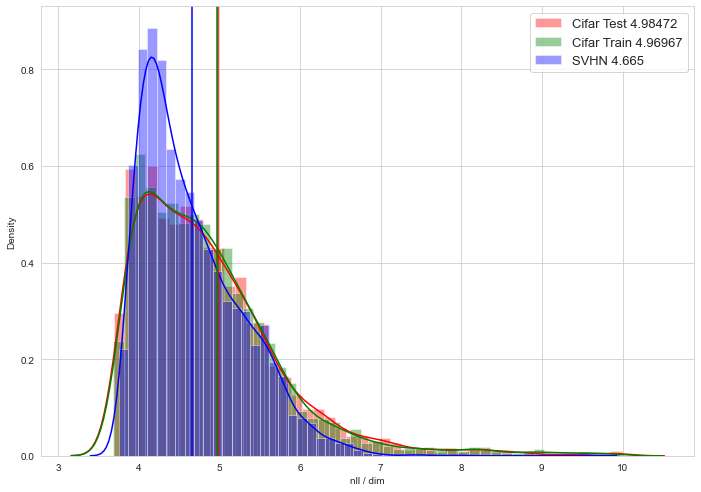

In [24]:
plot_all(TOP_NLL, threshold = 10)

In [25]:
print("Top NLL")

Top NLL


100.0 inliers
100.0 inliers
100.0 inliers


C:\Users\luifire\.conda\envs\pyrFlow\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\luifire\.conda\envs\pyrFlow\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\luifire\.conda\envs\pyrFlow\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

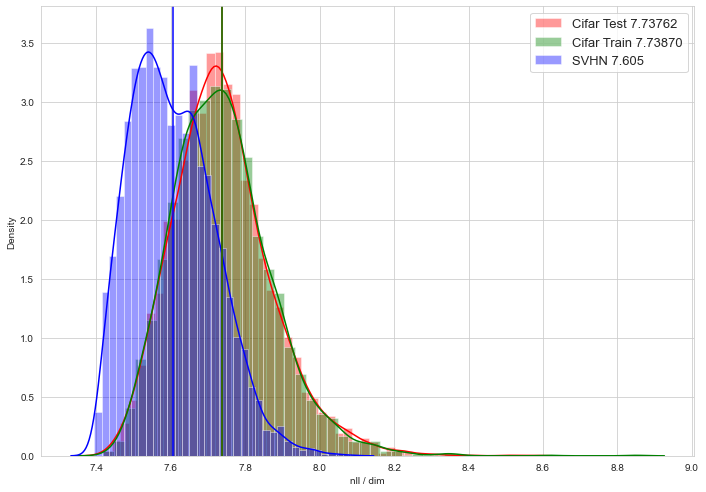

In [26]:
plot_all(COMPLETE_NLL, threshold = 1000)

In [27]:
print("Complete NLL")


Complete NLL
